In [103]:
import tensorflow as tf
import os

# remove the unwanted images

In [104]:
import cv2
import imghdr

In [105]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/data"

In [106]:
os.listdir(data_dir)

['sad', 'happy']

In [107]:
image_exts = ['jpeg','jpg','bmp','png']

In [108]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

#Load data

In [109]:
import numpy as np
from matplotlib import pyplot as plt

In [110]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data')

Found 305 files belonging to 2 classes.


In [111]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [112]:
data_iterator = data.as_numpy_iterator()

In [113]:
batch = data_iterator.next()

In [114]:
# 1 means sad people
# 0 means happy people
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int32)

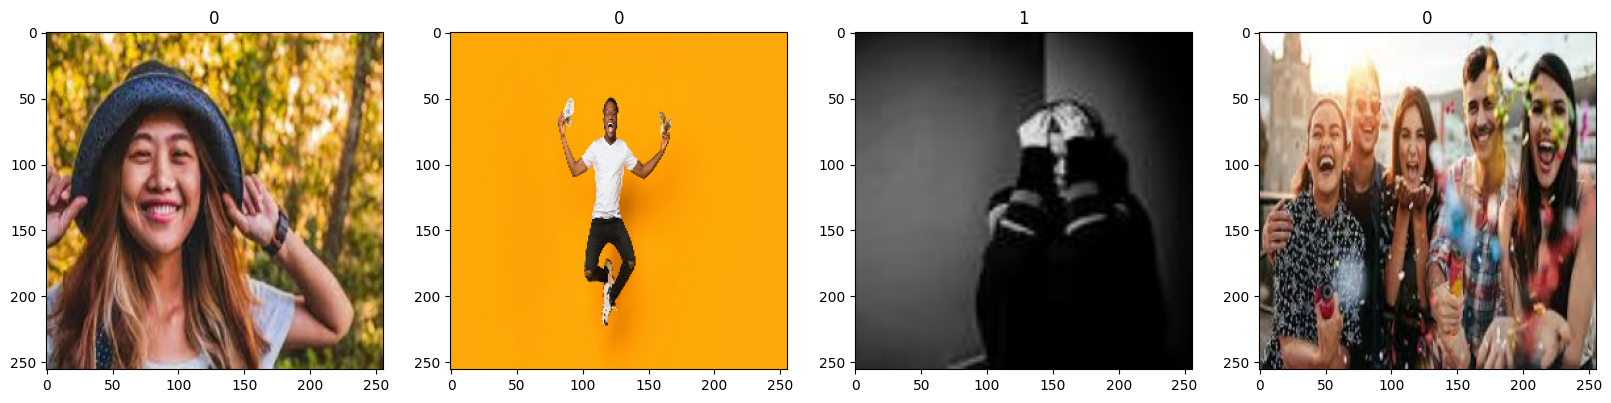

In [115]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# preprocessing our data

In [116]:
# scale the data

data = data.map(lambda x,y: (x/255,y))

In [117]:
scaled_iterator = data.as_numpy_iterator()

In [118]:
scaled_iterator.next()[0].max()

1.0

# Split the data

In [119]:
len(data)

10

In [120]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [121]:
train  = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building the model

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [123]:
model = Sequential()

In [124]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])



In [126]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# train

In [127]:
logdir = '/content/drive/MyDrive/Colab Notebooks/logs'


In [128]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])



Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 932ms/step - accuracy: 0.5863 - loss: 1.5335 - val_accuracy: 0.3906 - val_loss: 0.6967
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 657ms/step - accuracy: 0.5265 - loss: 0.6931 - val_accuracy: 0.7969 - val_loss: 0.6272
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 710ms/step - accuracy: 0.6711 - loss: 0.6492 - val_accuracy: 0.6875 - val_loss: 0.5858
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 928ms/step - accuracy: 0.5739 - loss: 0.6140 - val_accuracy: 0.8281 - val_loss: 0.5471
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 693ms/step - accuracy: 0.8563 - loss: 0.5004 - val_accuracy: 0.7188 - val_loss: 0.5372
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7266 - loss: 0.5298 - val_accuracy: 0.7344 - val_loss: 0.5526
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - accuracy: 0.8155 - loss: 0.4834 - val_accuracy: 0.7812 - val_loss: 0.4518
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 736ms/step - accuracy: 0.9024 - loss: 0.3598 - val_accuracy: 0.8750 - val_loss: 0

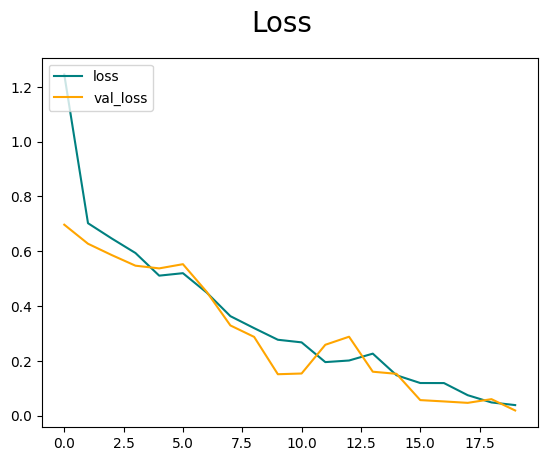

In [129]:
# Plot the performance

fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

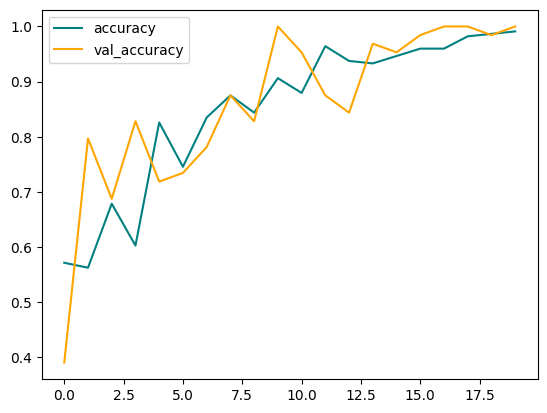

In [130]:
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [131]:
# Evaluate Performance
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [132]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


In [133]:
print(f'Precision:{pre.result().numpy()} , Recall :{re.result().numpy()} , Accuracy :{acc.result().numpy()}')

Precision:1.0 , Recall :1.0 , Accuracy :1.0


# test

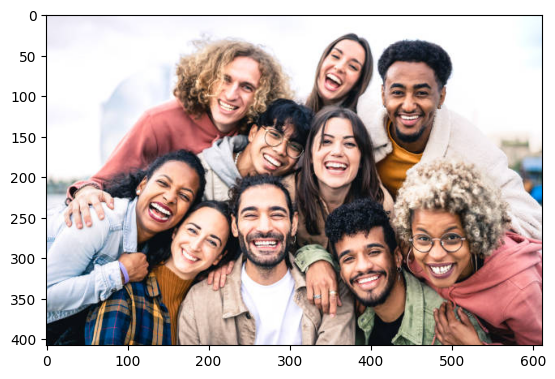

In [173]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/happy-test7.jpg')
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()

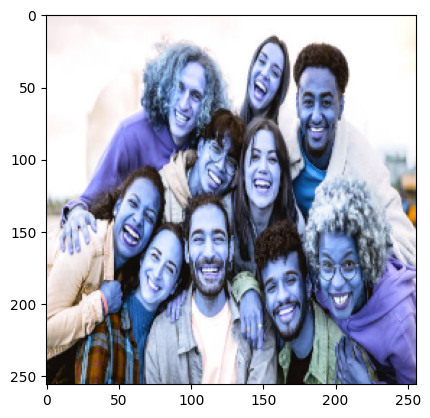

In [174]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [175]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [176]:
yhat

array([[0.00449361]], dtype=float32)

In [178]:
if yhat < 0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

Predicted class is Happy


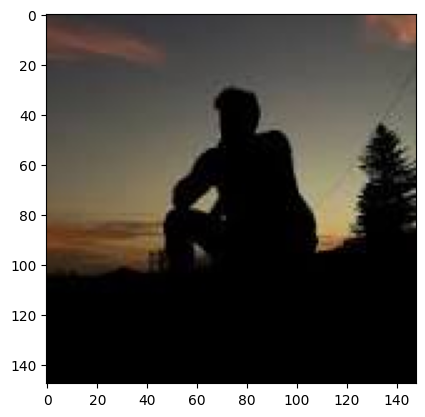

In [184]:
# test for sad image

import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sad-test.jpg')
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

plt.show()

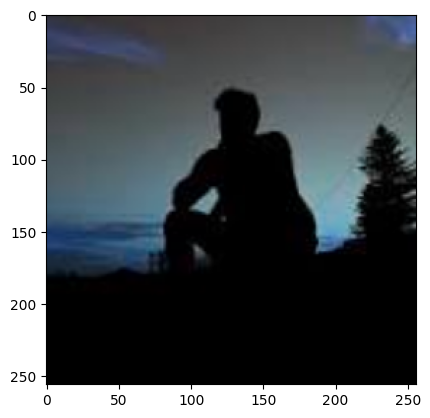

In [185]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [186]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [187]:
yhat

array([[0.99988365]], dtype=float32)

In [188]:
if yhat < 0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

Predicted class is Sad


In [190]:
# save the model

from tensorflow.keras.models import load_model
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/reusable-model','imageclassifier.h5'))